In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Csv folder/Invisibility Cloak.csv")

In [ ]:
df

,Participant,Cloak,Mischief
0,1,0,3
1,2,0,1
2,3,0,5
3,4,0,4
4,5,0,6
5,6,0,4
6,7,0,6
7,8,0,2
8,9,0,0
9,10,0,5


#ASSUMPTION 1: Scale Of Measurement
Mischief column is the independent variable and is concluded steadily

#ASSUMPTION 2: Group Categorization
Cloak is the independent variable as for it's group categorization it's 0 and 1


In [ ]:
groups = df['Cloak'].unique()

#ASSUMPTION 3: Independence Of Observation
Inferred from the experimental setup from which the dataset is derived.

#ASSUMPTION 4: Normality

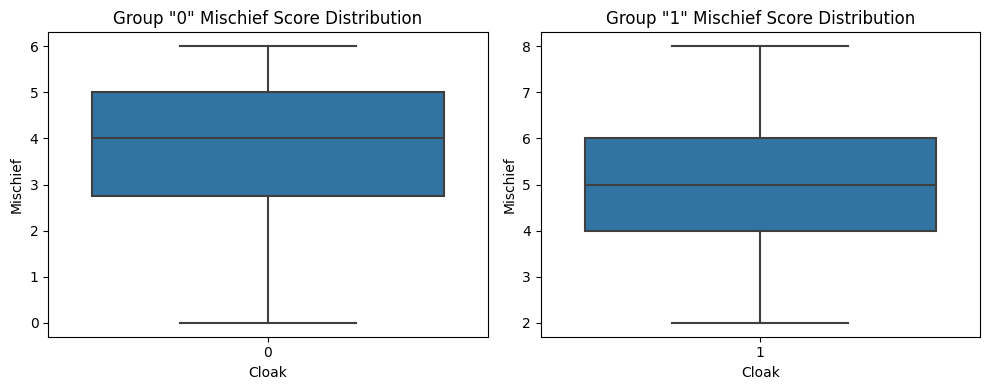

In [ ]:
plt.figure(figsize=(10, 4))

for i, group in enumerate(groups):
    plt.subplot(1, len(groups), i+1)
    sns.boxplot(x='Cloak', y='Mischief', data=df[df['Cloak'] == group])
    plt.title(f'Group "{group}" Mischief Score Distribution')

plt.tight_layout()
plt.show()







#ASSUMPTION 5: Homogeinity Of Variance

In [ ]:
groups = [0, 1]
mischief_by_group = [df[df['Cloak'] == group]['Mischief'] for group in groups]

levenes_test = stats.levene(*mischief_by_group)
levene_statistic, levene_p_value = levenes_test

levene_result_str = f"Levene's Test Statistic: {levene_statistic:.4f}\nLevene's Test P-value: {levene_p_value:.4f}"
print(levene_result_str)


Levene's Test Statistic: 0.2698
Levene's Test P-value: 0.6087


As the p-value exceeds 0.05, it implies that there are no notable differences in variances between the two groups

#Independent T-test

In [ ]:
if levene_p_value > 0.05:

    t_test_results = stats.ttest_ind(*mischief_by_group, equal_var=True)
    print("\nIndependent T-test Results:")
    print("T-test Statistic:", t_test_results.statistic)
    print("P-value:", t_test_results.pvalue)
else:
    print("\nAssumption of equal variances violated. Consider Welch's t-test or other approaches.")


Independent T-test Results:
T-test Statistic: -1.713459383965147
P-value: 0.10068634487481125


#Conclusion
The examination indicates that the observed contrast in Mischief scores between Group 0 and Group 1 in the context of "Cloak" yields a p-value of 0.1007. Given that this p-value exceeds the significance threshold of 0.05, it signifies statistical insignificance. In other words, there is no compelling evidence to suggest that the variations in Mischief scores can be attributed to the presence or absence of an "invisibility cloak."